In [2]:
import numpy as np # mathemtaical computation
# numpy is aliased as np
import pandas as pd # data preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt # visualization
# pyplot is aliased as plt
import seaborn as sns  # visualization
# seaborn is aliased as snspip

In [67]:
#importent library's 
# Major Import
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [4]:
df=pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.shape

(4340, 8)

In [8]:
# Split the column name to get the model of the car
#df["model"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
#df['model'].value_counts()

In [9]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
model            0
dtype: int64

In [10]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner,Mahindra
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner,Maruti
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner,Datsun
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner,Renault


In [9]:
# Drop all duplicated row
df = df.drop_duplicates()

df.shape

(3577, 9)

In [11]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'model'],
      dtype='object')

In [12]:
#df.dtypes

In [14]:
# View unique values from categorical features
categorical = [col for col in df.columns if df[col].dtypes == 'O']

for col in categorical:
  print(df[col].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [15]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [16]:
car = df.copy()

In [15]:
car["model"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Ford', 'Honda', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Fiat', 'Audi',
       'Datsun', 'BMW', 'Mercedes-Benz', 'Jaguar', 'Mitsubishi', 'Land',
       'Volvo', 'Jeep', 'Ambassador', 'MG', 'OpelCorsa', 'Daewoo', 'Force',
       'Isuzu', 'Kia'],
      dtype='object')

In [19]:
def percent(ax):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+0.2
        height = i.get_height()+4.3 
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=14,color='black')

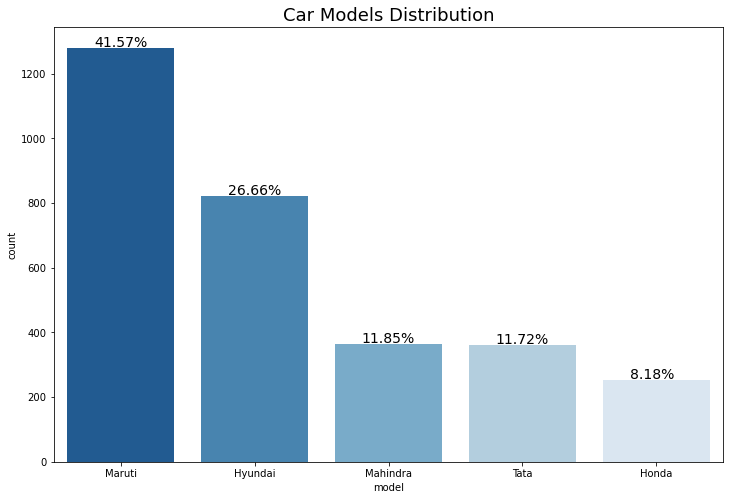

In [20]:
# Plot of Car Models Distribution
figure = plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="model", data=car, order = car['model'].value_counts().index[:5], palette='Blues_r')
percent(plot)

plt.show()

In [24]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Blues_r', verbose=True):
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count       4340
unique         5
top       Diesel
freq        2153
Name: fuel, dtype: object
mode:  0    Diesel
Name: fuel, dtype: object
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


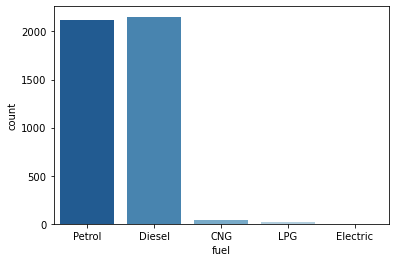

In [25]:
categorical_summarized(car, x='fuel')

count           4340
unique             3
top       Individual
freq            3244
Name: seller_type, dtype: object
mode:  0    Individual
Name: seller_type, dtype: object
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


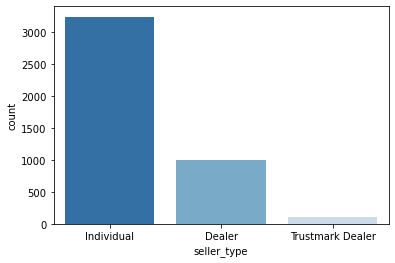

In [26]:
  categorical_summarized(car, x='seller_type')

count       4340
unique         2
top       Manual
freq        3892
Name: transmission, dtype: object
mode:  0    Manual
Name: transmission, dtype: object
Manual       3892
Automatic     448
Name: transmission, dtype: int64


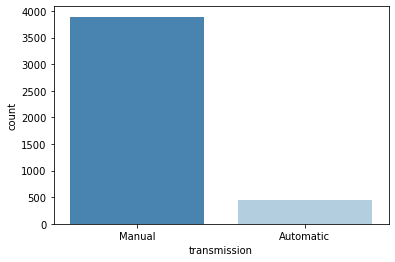

In [27]:
categorical_summarized(car, x='transmission')

count            4340
unique              5
top       First Owner
freq             2832
Name: owner, dtype: object
mode:  0    First Owner
Name: owner, dtype: object
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


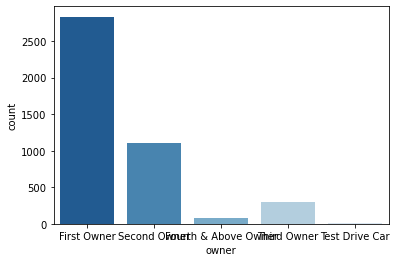

In [28]:
categorical_summarized(car, x='owner')

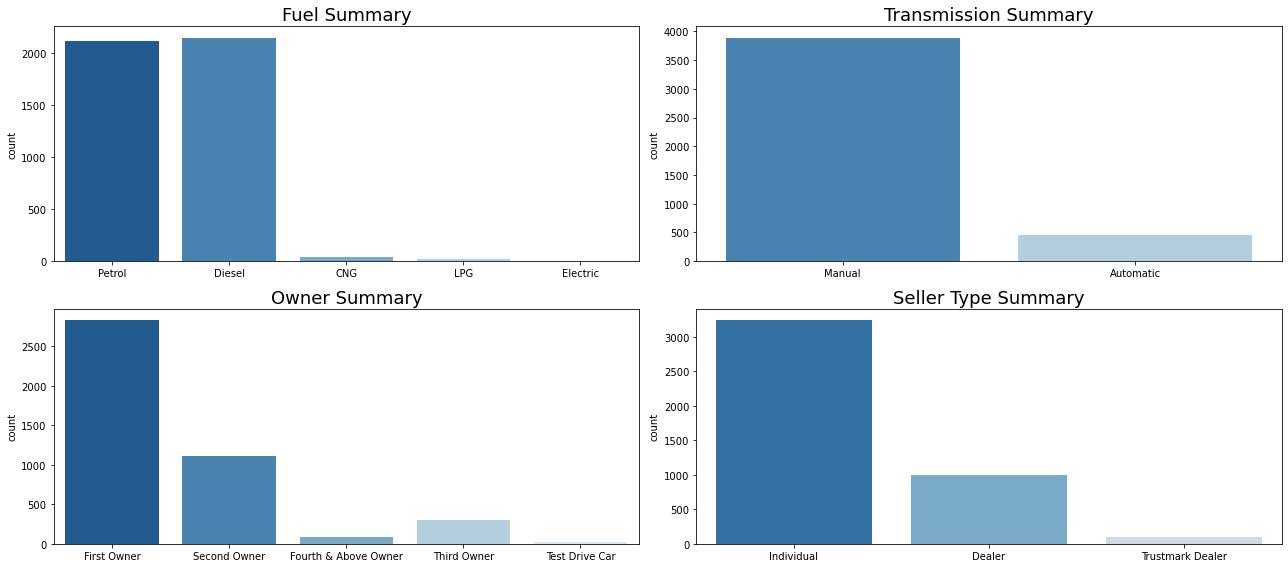

In [29]:
# Subplot of Categorical Summary
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=18)
sns.countplot(data=car, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=18)
sns.countplot(data=car, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=18)
sns.countplot(data=car, x='owner', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=18)
sns.countplot(data=car, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()

In [24]:
#### correlation metrix

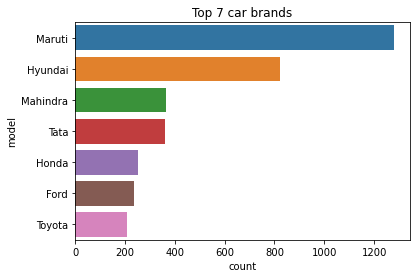

In [30]:
sns.countplot(y=df["model"],
              order=df['model'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 car brands')
plt.show()

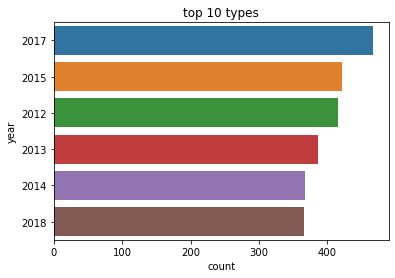

In [31]:
sns.countplot(y=df['year'],
             order=df['year'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('top 10 types')
plt.show()

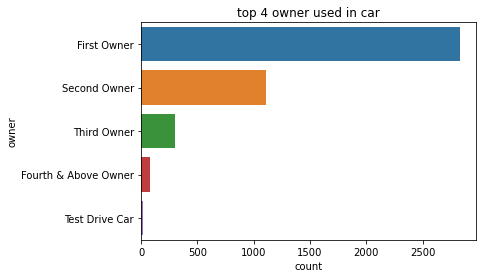

In [32]:
sns.countplot(y=df['owner'],
              order=df['owner'].value_counts().sort_values(ascending=False).index)
plt.title('top 4 owner used in car')
plt.show()

In [33]:
 df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'model'],
      dtype='object')

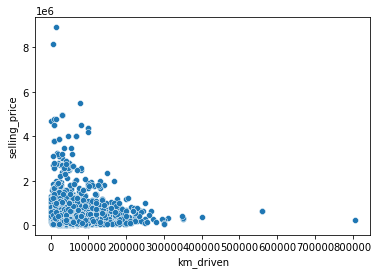

In [34]:
sns.scatterplot(y=df['selling_price'],x=df['km_driven'])
plt.show()

# Box for different fuels 

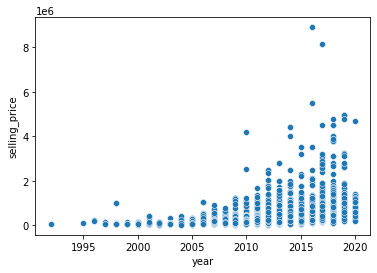

In [35]:
sns.scatterplot(x=df['year'],y=df['selling_price'])
plt.show()

#### Boxplot for Company based on Price

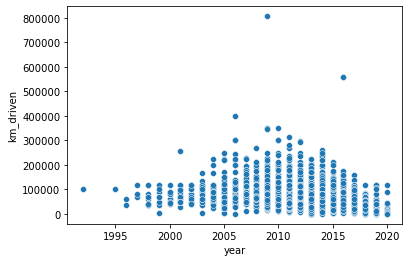

In [36]:
sns.scatterplot(x=df['year'],y=df['km_driven'])
plt.show()

In [37]:
### Detailed Analysis in selling_price, km_driven, year

In [38]:
pd.pivot_table(data=car, index=['name'],
               values=['selling_price','km_driven','year']).sort_values(by='selling_price', ascending=False)

,km_driven,selling_price,year
name,,,
Audi RS7 2015-2019 Sportback Performance,13000.0,8900000.0,2016.0
Mercedes-Benz S-Class S 350d Connoisseurs Edition,6500.0,8150000.0,2017.0
Mercedes-Benz GLS 2016-2020 350d 4MATIC,77350.0,5500000.0,2016.0
BMW X5 xDrive 30d xLine,30000.0,4950000.0,2019.0
Audi A5 Sportback,1500.0,4700000.0,2020.0
...,...,...,...
OpelCorsa 1.4 GL,100000.0,35000.0,2002.0
Tata Nano Std BSII,50000.0,35000.0,2009.0
Maruti 800 EX,45000.0,35000.0,2002.5


In [40]:
pd.pivot_table(data=car, index=['name'],
               
               values=['selling_price','km_driven','year']).sort_values(by='km_driven', ascending=False)

,km_driven,selling_price,year
name,,,
Maruti SX4 S Cross DDiS 320 Delta,400000.0,5.516667e+05,2015.666667
Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,350000.0,2.800000e+05,2010.000000
Volkswagen Jetta 2.0 TDI Comfortline,312000.0,3.500000e+05,2011.000000
Mahindra Xylo E9,295000.0,3.000000e+05,2012.000000
Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,281500.0,5.500000e+05,2008.000000
...,...,...,...
Ford Ecosport Sports Petrol,1000.0,1.100000e+06,2020.000000
Renault KWID Climber 1.0 MT Opt BSIV,1000.0,5.410000e+05,2020.000000
Honda Amaze S Petrol BSIV,1000.0,6.140000e+05,2020.000000


In [41]:
pd.pivot_table(data=car, index=['name'], 
               values=['selling_price','km_driven','year']).sort_values(by='year', ascending=False)

,km_driven,selling_price,year
name,,,
Hyundai Venue SX Opt Turbo BSIV,1100.0,1050000.0,2020.0
Honda Amaze S Petrol BSIV,1000.0,614000.0,2020.0
Hyundai Grand i10 Nios Magna CRDi,1400.0,700000.0,2020.0
Maruti Alto K10 LXI CNG,40000.0,282000.0,2020.0
Tata Harrier XE,1000.0,426000.0,2020.0
...,...,...,...
Maruti Omni 5 Str STD,60000.0,65000.0,1998.0
Mercedes-Benz E-Class 230,35000.0,1000000.0,1998.0
Maruti Esteem AX,70000.0,79000.0,1997.0


In [36]:
###How does Categorical Feature affects selling_price

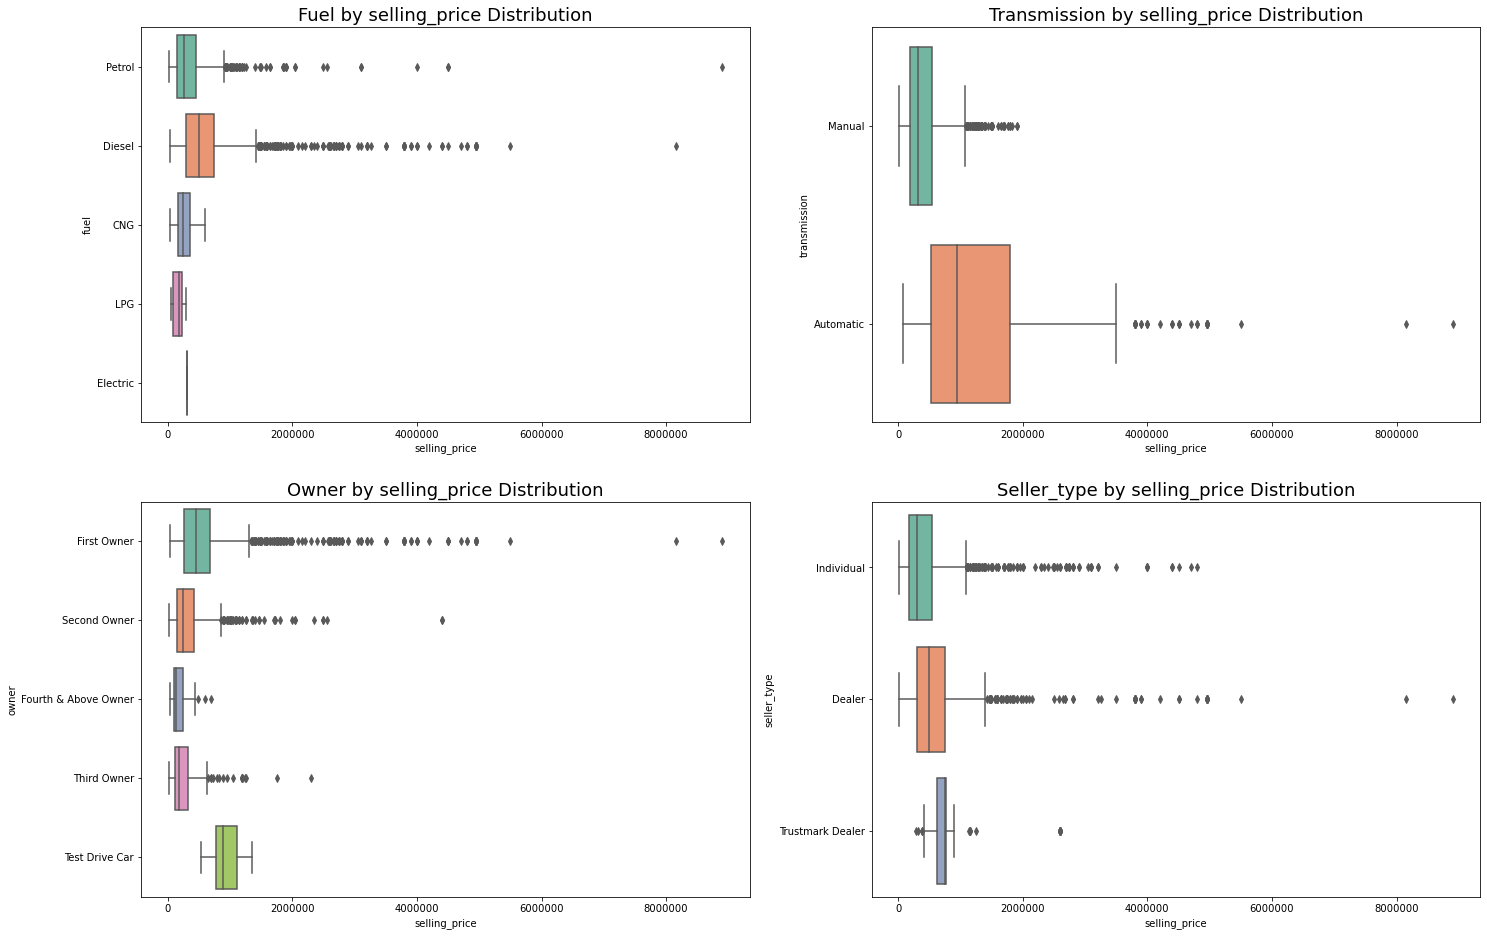

In [42]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

In [38]:
###Distribution Plot for Price

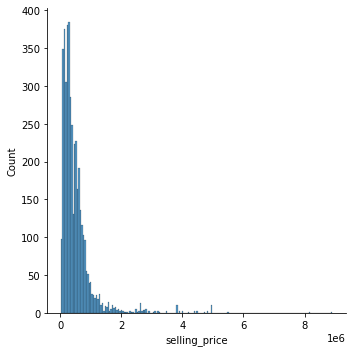

In [43]:
sns.displot(df['selling_price'])
plt.show()

In [40]:
###correlation

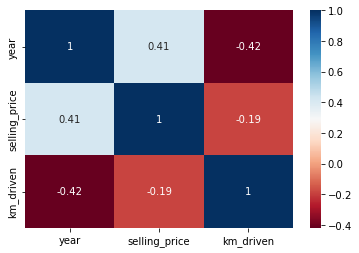

In [44]:
corr =  df.corr()


sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [45]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
year,4340.0,2013.090783,4.215344,1992.0,2001.00,2003.0,2004.0,2005.0,2014.0,2019.0,2019.0,2020.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,55000.00,65000.0,70000.0,80000.0,350000.0,1720750.0,2492200.0,3200000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,1444.68,5000.0,6483.4,10000.0,60000.0,163830.0,186000.0,220000.0,806599.0


In [46]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'model'],
      dtype='object')

In [44]:
#### Outlier handling

In [45]:
#### We will handle Encoding catgeorical columns using ColumnTransformer
#### Select x(independent features) and y(dependent feature)

In [47]:
x = df.drop('selling_price',axis=1)
y = df['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4340, 8)
(4340,)


In [48]:
print(3577*0.25)

894.25


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3255, 8)
(1085, 8)
(3255,)
(1085,)


In [49]:
#### Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [51]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [52]:
x_train.dtypes

name            object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
model           object
dtype: object

In [53]:
####Import ML model buliding libraries

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [56]:
#Columns index that needs to undergo OnehOtEncoding - [0,1,6,9,10]

In [57]:
#### 1) LinearRegression

In [58]:
#### 2) Ridge Regression 

In [59]:
#### 4) RandomForest Model

In [60]:
#### 5) Decision Tree Regressor

In [61]:
#### DT is the best performing model based on RMSE

In [62]:
#### Model saving

In [55]:
import pickle

In [72]:
pickle.dump(df,open('datacar.pkl','wb'))
pickle.dump(Pipeline, open('dt_modelcar.pkl', 'wb'))